# DATA READING

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Creating dataframe
df = pd.read_csv('train.csv')

In [3]:
# (rows,cols)
df.shape

(892, 6)

In [4]:
# top 5 rows
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
# last 5 rows
df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

# Notes:-
1. Year: obj to int
2. year col has a non-year value
3. price has a string
4. price: obj to int
5. kms_driven: obj to int

# DATA PREPARATION

In [8]:
Backup = df.copy()

In [9]:
df = df[df['year'].str.isnumeric()]

In [10]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [11]:
df['year']=df['year'].astype(int)

In [12]:
df['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [13]:
df = df[df['Price'] != "Ask For Price"]

In [14]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [15]:
df['Price'] = df['Price'].str.replace(',','').astype('int')

C:\Users\sibap\AppData\Local\Temp\ipykernel_21172\718071437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(',','').astype('int')


In [16]:
df['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [17]:
df['kms_driven']=df['kms_driven'].str.replace(',','')

C:\Users\sibap\AppData\Local\Temp\ipykernel_21172\1649441667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace(',','')


In [18]:
df['kms_driven']=df['kms_driven'].str.replace('kms','')

C:\Users\sibap\AppData\Local\Temp\ipykernel_21172\3853180787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace('kms','')


In [19]:
df = df[df['kms_driven'] != 'Petrol']

In [20]:
df['kms_driven'] = df['kms_driven'].astype(int)

C:\Users\sibap\AppData\Local\Temp\ipykernel_21172\822853482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].astype(int)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [22]:
df.dropna()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [23]:
df3 = df.copy()

In [24]:
df3

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['company'] = encoder.fit_transform(df['company'])
df['name'] = encoder.fit_transform(df['name'])
df['fuel_type'] = encoder.fit_transform(df['fuel_type'])

C:\Users\sibap\AppData\Local\Temp\ipykernel_21172\2721189649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company'] = encoder.fit_transform(df['company'])
C:\Users\sibap\AppData\Local\Temp\ipykernel_21172\2721189649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = encoder.fit_transform(df['name'])
C:\Users\sibap\AppData\Local\Temp\ipykernel_21172\2721189649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Exploratory Data Analysis

In [26]:
# top 5 rows
df3.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [27]:
# last 5 rows
df3.tail()

,name,company,year,Price,kms_driven,fuel_type
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel


In [28]:
# (rows,cols)
df3.shape

(817, 6)

In [29]:
# brief statistical analysis of dataframe
df3.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [30]:
# no. of duplicated values
df3.duplicated().sum()

92

In [31]:
# no. of unique values
df3.nunique()

name          463
company        25
year           21
Price         272
kms_driven    247
fuel_type       3
dtype: int64

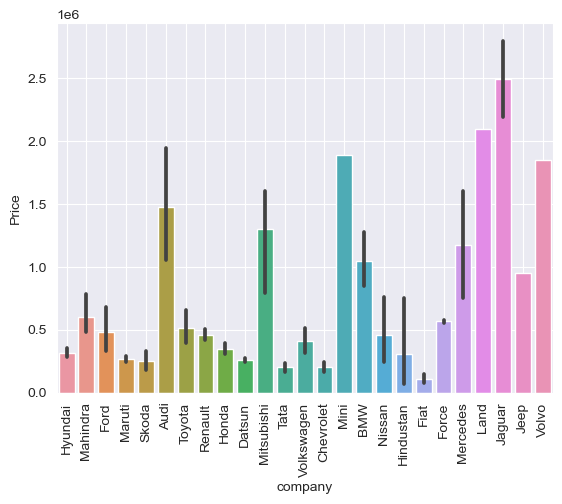

In [32]:
sns.set_style('dark')
sns.barplot(x=df3.company,y=df3.Price)
plt.xticks(rotation=90)
plt.grid()

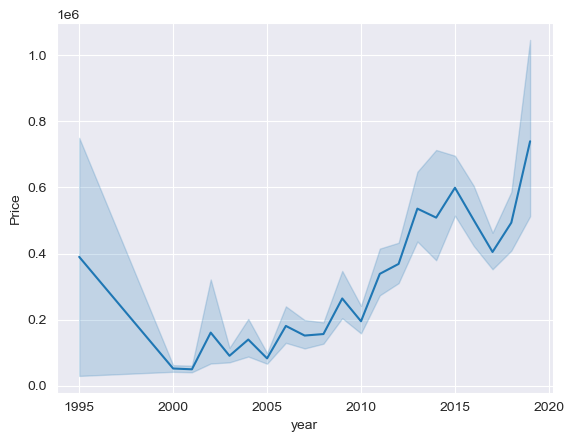

In [33]:
sns.set_style('dark')
sns.lineplot(x=df.year,y=df.Price)
plt.grid()

<Axes: xlabel='fuel_type', ylabel='Price'>

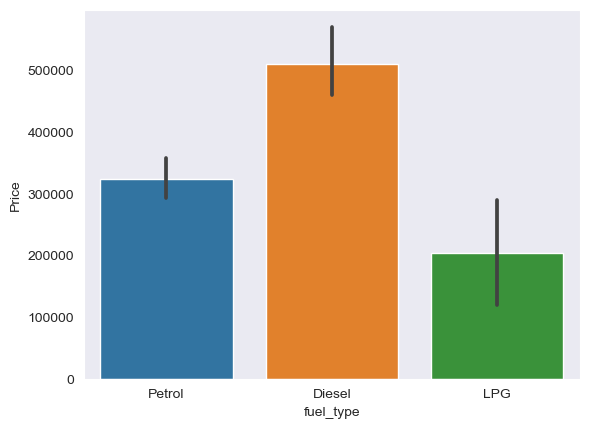

In [34]:
sns.barplot(x=df3.fuel_type,y=df.Price)

<Axes: xlabel='fuel_type', ylabel='kms_driven'>

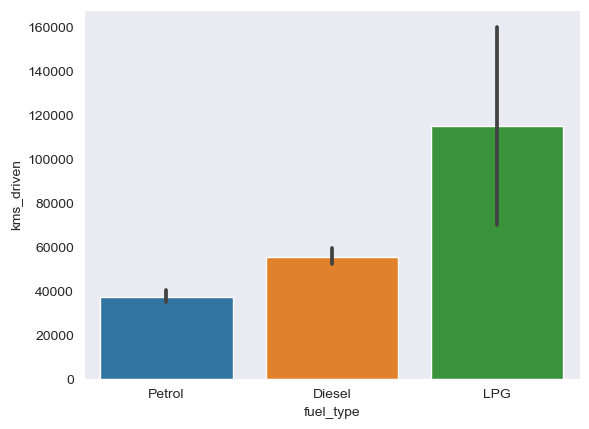

In [35]:
sns.barplot(x=df3.fuel_type,y=df3.kms_driven)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Hyundai'),
  Text(1, 0, 'Mahindra'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Maruti'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Renault'),
  Text(8, 0, 'Honda'),
  Text(9, 0, 'Datsun'),
  Text(10, 0, 'Mitsubishi'),
  Text(11, 0, 'Tata'),
  Text(12, 0, 'Volkswagen'),
  Text(13, 0, 'Chevrolet'),
  Text(14, 0, 'Mini'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Nissan'),
  Text(17, 0, 'Hindustan'),
  Text(18, 0, 'Fiat'),
  Text(19, 0, 'Force'),
  Text(20, 0, 'Mercedes'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'Jaguar'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Volvo')])

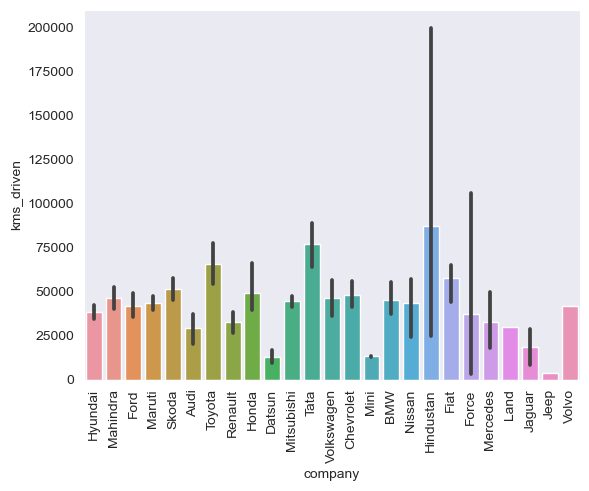

In [36]:
sns.barplot(x=df3.company,y=df3.kms_driven)
plt.xticks(rotation=90)

In [37]:
df.corr(method='pearson')

,name,company,year,Price,kms_driven,fuel_type
name,1.000000,0.968557,-0.018386,-0.037090,0.163770,-0.126273
company,0.968557,1.000000,0.026570,-0.047956,0.169052,-0.157938
year,-0.018386,0.026570,1.000000,0.287351,-0.232916,-0.193370
Price,-0.037090,-0.047956,0.287351,1.000000,-0.120614,-0.195151
kms_driven,0.163770,0.169052,-0.232916,-0.120614,1.000000,-0.265104
fuel_type,-0.126273,-0.157938,-0.193370,-0.195151,-0.265104,1.000000


In [38]:
df3.groupby(df3['company']).fuel_type.value_counts()

company     fuel_type
Audi        Diesel         7
            Petrol         4
BMW         Diesel         5
            Petrol         3
Chevrolet   Diesel        21
            Petrol        13
Datsun      Petrol         7
Fiat        Petrol         3
            Diesel         1
Force       Diesel         4
Ford        Diesel        19
            Petrol        11
Hindustan   Diesel         2
            Petrol         1
Honda       Petrol        45
            Diesel        15
Hyundai     Petrol       112
            Diesel        27
Jaguar      Diesel         1
            Petrol         1
Jeep        Diesel         1
Land        Diesel         1
Mahindra    Diesel        95
            Petrol         3
Maruti      Petrol       159
            Diesel        60
            LPG            2
Mercedes    Petrol         4
            Diesel         2
Mini        Petrol         8
Mitsubishi  Diesel         4
            Petrol         2
Nissan      Diesel         3
            Petrol   

In [39]:
df3.groupby(df3['company']).year.value_counts()

company     year
Audi        2009    2
            2012    2
            2013    2
            2014    2
            2015    1
                   ..
Volkswagen  2013    2
            2010    1
            2017    1
            2019    1
Volvo       2015    1
Name: year, Length: 177, dtype: int64

# MODELLING

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
x = df.drop(columns=['Price'])
y=df.Price

In [42]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.03,random_state=36)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.score(X_test,y_test)

0.3275290887377943

In [48]:
import pickle
with open('car_price_prediction','wb') as f:
    pickle.dump(model,f)

# AUTHOR : Siba Prasad Das